# Модуль Б

# 2.1 Построение аналитической системы

## 2.1.1 Определение инструмента для построения аналитической системы

В качестве инструмента используется Orange — это инструмент для визуализации и анализа данных с открытым исходным кодом.

Orange — это библиотека Python. Интеллектуальный анализ данных (Data mining) осуществляется с помощью визуального программирования или сценариев Python.

Процесс построения workflow в Orange происходит путём манипуляций с иконками-виджетами.

### Workflow

<img src='1.png' width=600, heigth=600>

Так выглядит workflow. Виджеты разделены на разные группы:

- Data -  виджеты для ввода/вывода данных, фильтрации, выделения и манипулирования выборками.

- Visualize - виджеты для общей (прямоугольная диаграмма, гистограммы, точечная диаграмма) и многомерной визуализации (мозаичная диаграмма, диаграмма-сито).

- Model - набор алгоритмов машинного обучения для классификации и регрессии.

- Evaluate - кросс-валидация, процедуры на основе выборки, оценка методов предсказания;

## 2.1.2 Извлечение данных из внешней системы

### Извлечение данных из csv файла

<img src='2.png' width=600, heigth=600>

С помощью виджета File можно извлечь данные. Для этого необходимо прописать путь к файлу, после загрузки файла появятся поля загружаемого набора, у которых можно изменить тип, а также присвоить ему target и features, если необходимо, некоторые поля можно убрать.

### Извлечение данных из базы данных sql

<img src='3.png' width=600, heigth=600>

С помощью виджета SQL Table можно получить данные из базы данных заполнив все необходимые поля и выбрав таблицу.

### Data Table

<img src='4.png' width=600, heigth=600>

Виджет Data Table позволяет отобразить загруженный набор данных.

## 2.1.3 Отслеживание тенденций

### Графики распределения. Виджет Distributions

### Количество записей по количеству пассажиров

<img src='5.png' width=600, heigth=600>

На данном графике можно увидеть количество записей поездок по количеству пассажиров. Результат показал, что в основном люди в такси едут одни.

### Количество записей по месяцам

<img src='6.png' width=600, heigth=600>

График показал, что больше всего поездок было в декабре.

### Графики зависимости. Виджет Sccatter Plot

### График зависимости дистанции поездки и стоимости за проезд

<img src='7.png' width=800, heigth=800>

График показывает, что чем больше стоимость поездки, тем больше пройденный путь.

### График зависимости стоимости проезда и тарифа

<img src='8.png' width=800, heigth=800>

График показывает, что чем больше тариф, тем дороже стоимость поездки.

## 2.1.4 Сортировка и фильтрация

### Сортировка

<img src='9.png' width=800, heigth=800>

С помощью виджета Group By можно отсортировать данные. Для начала необходимо выбрать по каким полям будут сортироваться данные, а потом выбрать условия сортировки, например по возрастанию или убыванию.

### Фильтрация

<img src='10.png' width=800, heigth=800>

Виджет Filtre фильтрует клетки или гены по количеству положительных измерений. Можно выбрать гены в визуализации, чтобы удалить нечастые и слишком часто встречающиеся клетки/гены.

## 2.2 Анализ временных рядов

### 2.2.1 Импорт данных и работа в библиотеке Pandas

In [22]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,passenger_count
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.2,0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,1,1.0
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.2,0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,1,1.0
2,2020-01-01 00:47:41,2020-01-01 00:53:52,0.6,0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,1,1.0
3,2019-12-18 15:30:35,2019-12-18 15:31:35,0.0,0,1.0,2.5,0.5,0.5,0.00,0.0,0.3,6.30,2.5,12,4.0
4,2020-01-01 00:29:01,2020-01-01 00:40:28,0.7,0,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5,1,2.0


В качесте индекса берется дата и время начала поездки.

In [4]:
df.set_index('tpep_pickup_datetime', inplace = True)
df.head()

,tpep_dropoff_datetime,trip_distance,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,passenger_count
tpep_pickup_datetime,,,,,,,,,,,,,,
2020-01-01 00:28:15,2020-01-01 00:33:03,1.2,0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,1,1.0
2020-01-01 00:35:39,2020-01-01 00:43:04,1.2,0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,1,1.0
2020-01-01 00:47:41,2020-01-01 00:53:52,0.6,0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,1,1.0
2019-12-18 15:30:35,2019-12-18 15:31:35,0.0,0,1.0,2.5,0.5,0.5,0.00,0.0,0.3,6.30,2.5,12,4.0
2020-01-01 00:29:01,2020-01-01 00:40:28,0.7,0,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5,1,2.0


Изменение даты с объекта object на  datetime.

In [5]:
df.index = pd.to_datetime(df.index)
df.index[:5]

DatetimeIndex(['2020-01-01 00:28:15', '2020-01-01 00:35:39',
               '2020-01-01 00:47:41', '2019-12-18 15:30:35',
               '2020-01-01 00:29:01'],
              dtype='datetime64[ns]', name='tpep_pickup_datetime', freq=None)

### 2.2.2 Изменение шага временного ряда, скользящее среднее

Изменение шага данных. Получение средних значений по каждому месяцу разных годов.

In [71]:
resampled = df.resample('M').mean()

In [72]:
resampled

,trip_distance,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,passenger_count
tpep_pickup_datetime,,,,,,,,,,,,,
2019-12-31,1.643393,0.0,1.0,8.053571,0.491071,0.5,2.080893,0.0,0.3,13.960357,2.5,12.0,2.178571
2020-01-31,1.518921,0.0,1.0,8.368164,1.148064,0.5,2.152744,0.0,0.3,14.154483,2.5,1.0,1.507100
2020-02-29,1.512368,0.0,1.0,8.488849,1.145147,0.5,2.163826,0.0,0.3,14.283061,2.5,2.0,1.498232
2020-03-31,1.557416,0.0,1.0,8.428251,1.155943,0.5,2.145875,0.0,0.3,14.205659,2.5,3.0,1.464439
2020-04-30,1.637287,0.0,1.0,7.489451,1.362087,0.5,2.049638,0.0,0.3,13.132473,2.5,4.0,1.298943
2020-05-31,1.665018,0.0,1.0,7.688495,1.338486,0.5,2.082068,0.0,0.3,13.342345,2.5,5.0,1.314813
2020-06-30,1.664736,0.0,1.0,8.013756,1.278105,0.5,2.134111,0.0,0.3,13.736146,2.5,6.0,1.357107
2020-07-31,1.642142,0.0,1.0,8.045366,1.212870,0.5,2.127551,0.0,0.3,13.771773,2.5,7.0,1.382332
2020-08-31,1.622825,0.0,1.0,8.075007,1.108028,0.5,2.127929,0.0,0.3,13.792151,2.5,8.0,1.411349


In [74]:
resampled.drop(resampled.tail(1).index, inplace=True)

Удаление последней записи так как она относится к 2022 году.

### Зависимость дистанции поездки от даты

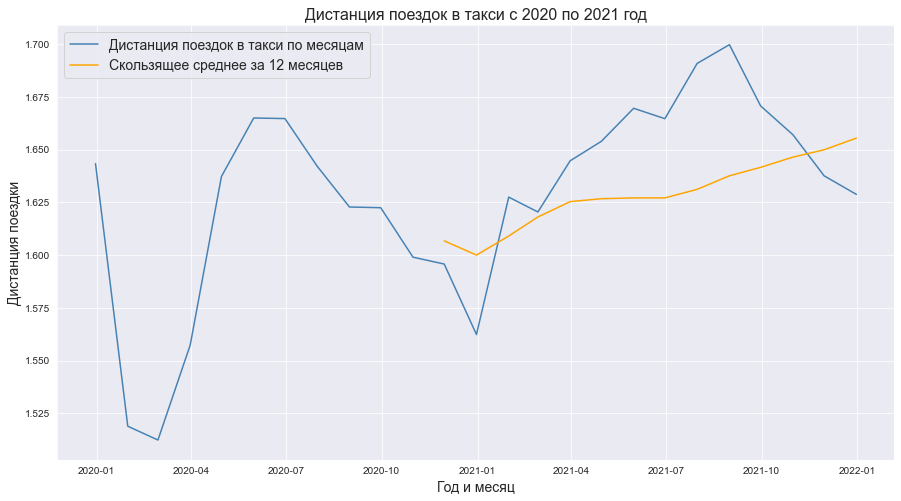

In [99]:
plt.figure(figsize = (15,8))


plt.plot('trip_distance',data=resampled, label = 'Дистанция поездок в такси по месяцам', color = 'steelblue')
plt.plot('trip_distance', data=resampled.rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')

plt.legend(title = '', loc = 'upper left', fontsize = 14)

plt.xlabel('Год и месяц', fontsize = 14)
plt.ylabel('Дистанция поездки', fontsize = 14)
plt.title('Дистанция поездок в такси с 2020 по 2021 год', fontsize = 16)

plt.show()

На графике видно, что поездки с самыми большими дистанциями проходят летом в июне, июле и августе.

### Зависимость стоимости проезда от даты

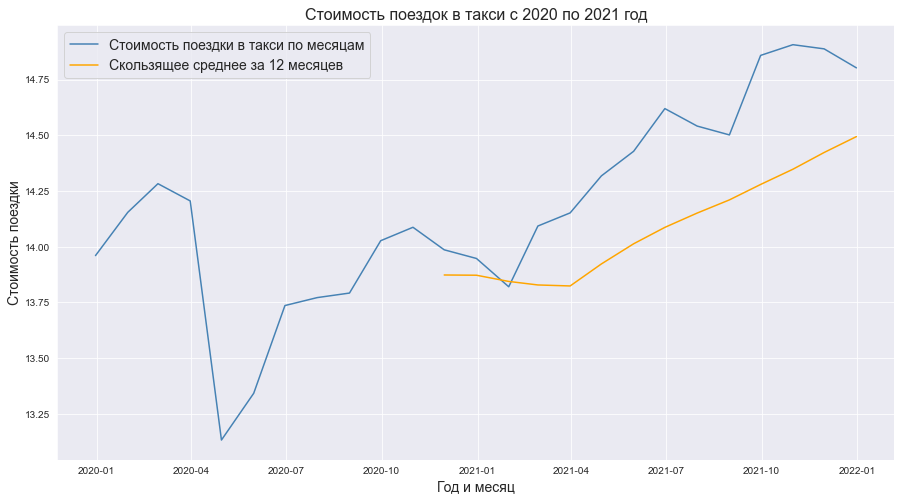

In [90]:
plt.figure(figsize = (15,8))


plt.plot('total_amount',data=resampled, label = 'Стоимость поездки в такси по месяцам', color = 'steelblue')
plt.plot('total_amount', data=resampled.rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')

plt.legend(title = '', loc = 'upper left', fontsize = 14)

plt.xlabel('Год и месяц', fontsize = 14)
plt.ylabel('Стоимость поездки', fontsize = 14)
plt.title('Стоимость поездок в такси с 2020 по 2021 год', fontsize = 16)

plt.show()

На графике видно, что стоимость проезда с 2020 сильно увеличилась и продолжает расти.

### Зависимость суммы чаевых от даты

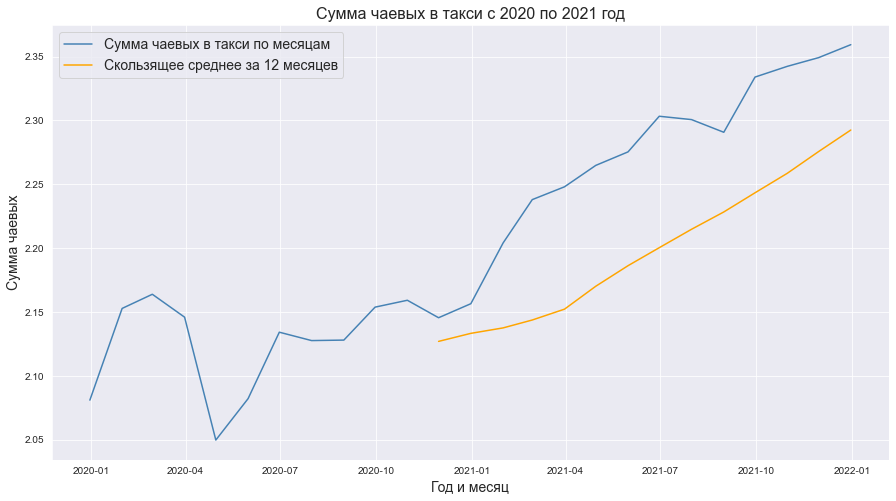

In [126]:
plt.figure(figsize = (15,8))


plt.plot('tip_amount',data=resampled, label = 'Сумма чаевых в такси по месяцам', color = 'steelblue')
plt.plot(resampled['tip_amount'].rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')

plt.legend(title = '', loc = 'upper left', fontsize = 14)

plt.xlabel('Год и месяц', fontsize = 14)
plt.ylabel('Сумма чаевых', fontsize = 14)
plt.title('Сумма чаевых в такси с 2020 по 2021 год', fontsize = 16)

plt.show()

На графике видно, что сумма оставленных чаевых начала расти с 2021 года и продолжает расти.

### 2.2.3 Разложение временного ряда на компоненты

In [101]:
#импорт библиотек
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

### Сезонность, тренд и случаный колебания 

### Стоимость проезда

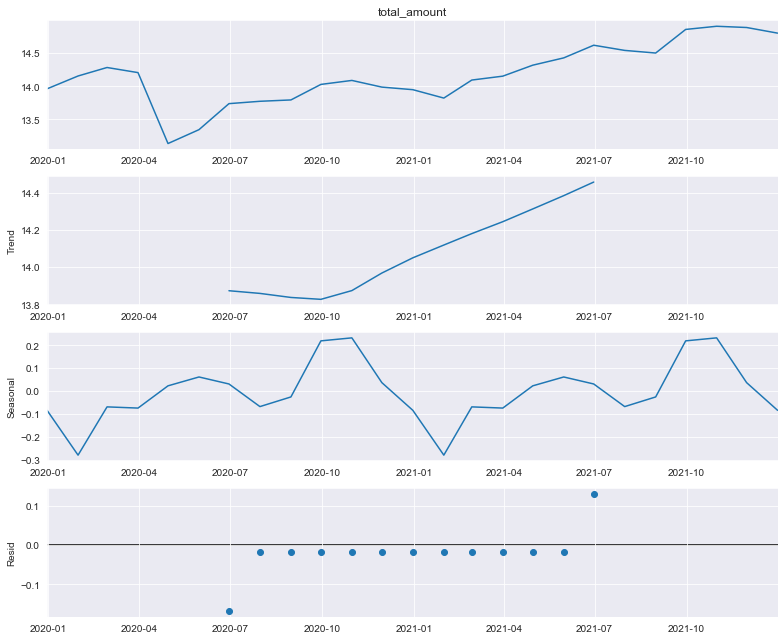

In [134]:
rcParams['figure.figsize'] = 11, 9

decompose = seasonal_decompose(resampled['total_amount'])
decompose.plot()

plt.show()

### Сумма чаевых

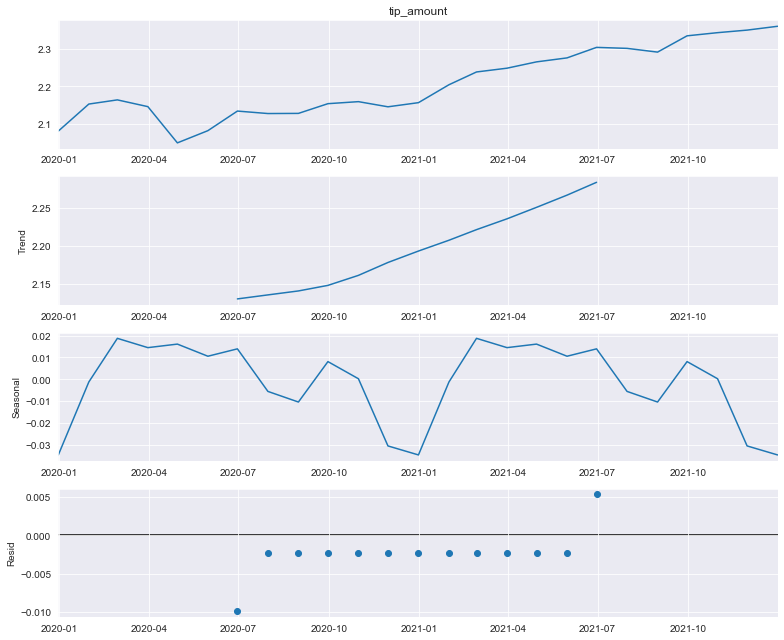

In [135]:
rcParams['figure.figsize'] = 11, 9

decompose = seasonal_decompose(resampled['tip_amount'])
decompose.plot()

plt.show()

### Дистанция поездки

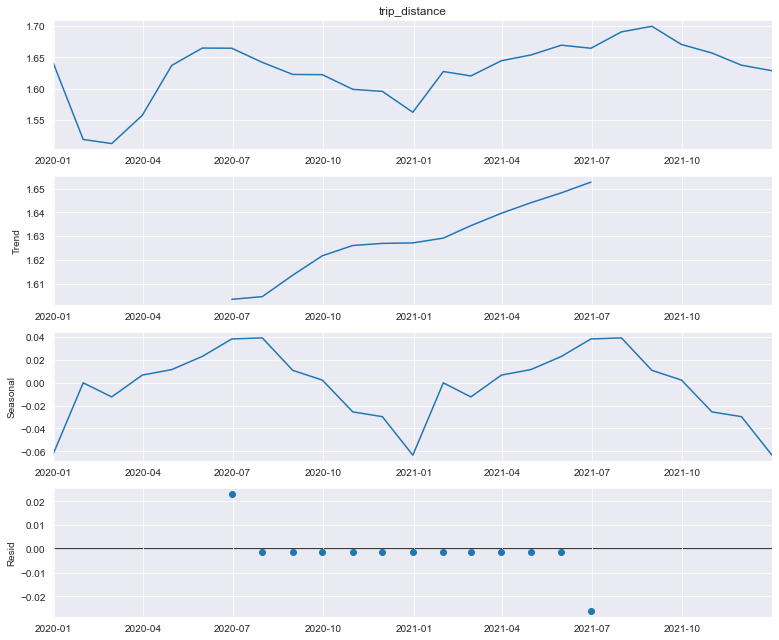

In [136]:
rcParams['figure.figsize'] = 11, 9

decompose = seasonal_decompose(resampled['trip_distance'])
decompose.plot()

plt.show()

Во всех трех случаях можно заметить, что временной ряд не стационарный, так как во всех случаях видно что тренд растет.

### 2.2.4 Проверка временного ряда на стационарность

### Тест Дики-Фуллера

In [137]:
from statsmodels.tsa.stattools import adfuller

In [138]:
adf_test = adfuller(resampled['total_amount'])
print('p-value = ' + str(adf_test[1]))

p-value = 0.6776129409199121


In [139]:
adf_test = adfuller(resampled['tip_amount'])
print('p-value = ' + str(adf_test[1]))

p-value = 0.8756012546002891


In [141]:
adf_test = adfuller(resampled['trip_distance'])
print('p-value = ' + str(adf_test[1]))

p-value = 0.5402896811594703


Временной ряд для стоимости поездки, суммы чаевых и дистанции поездки не стационарный, так как тест показал значение больше 0,5.

### 2.2.5 Автокорреляция

Берутся данные о стоимости поездки и подсчитывается корреляция для лага 1.

In [158]:
data = resampled['total_amount']

lag_1 = data[1:]

np.round(np.corrcoef(data[:-1], lag_1)[0,1], 2)

0.82

Text(0.5, 1.0, 'Автокорреляция с лагом 1')

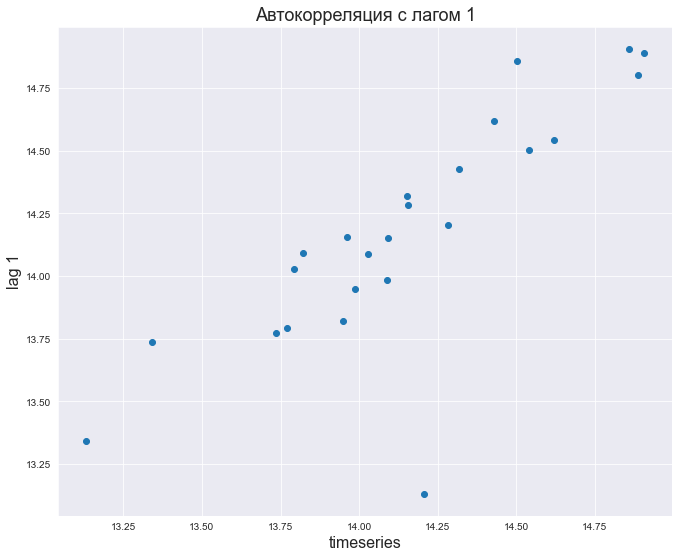

In [159]:
plt.scatter(data[:-1], lag_1)
 
plt.xlabel('timeseries', fontsize = 16)
plt.ylabel('lag 1', fontsize = 16)
plt.title('Автокорреляция с лагом 1', fontsize = 18)

In [160]:
from statsmodels.graphics.tsaplots import plot_acf

### 2.2.6 Применение автокорреляционной функции к набору данных

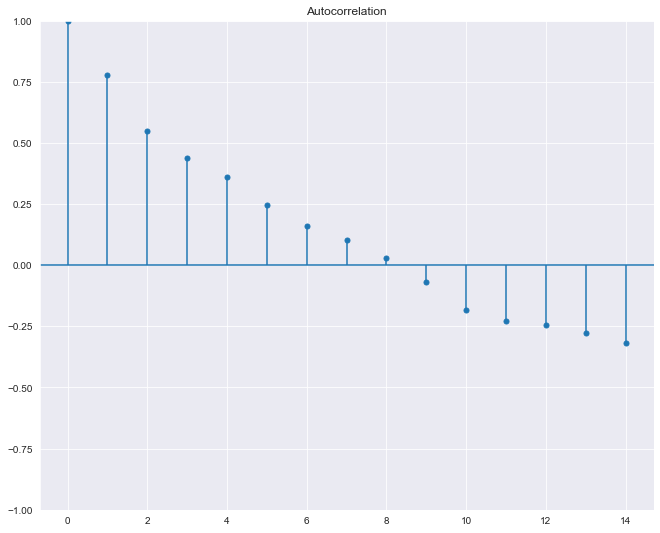

In [162]:
plot_acf(data, alpha = None)
plt.show()

### Коррелограммы

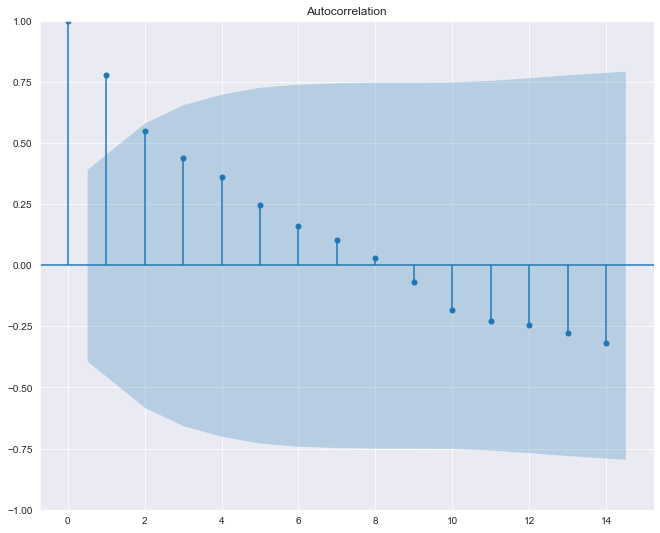

In [155]:
plot_acf(resampled['total_amount'])
plt.show()

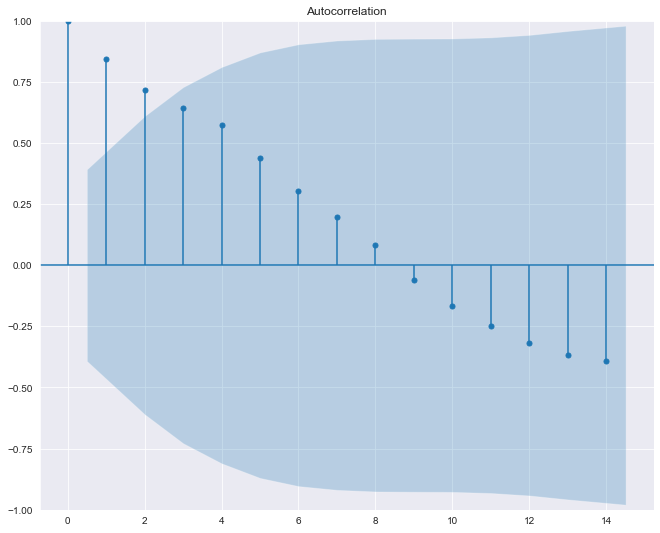

In [163]:
plot_acf(resampled['tip_amount'])
plt.show()

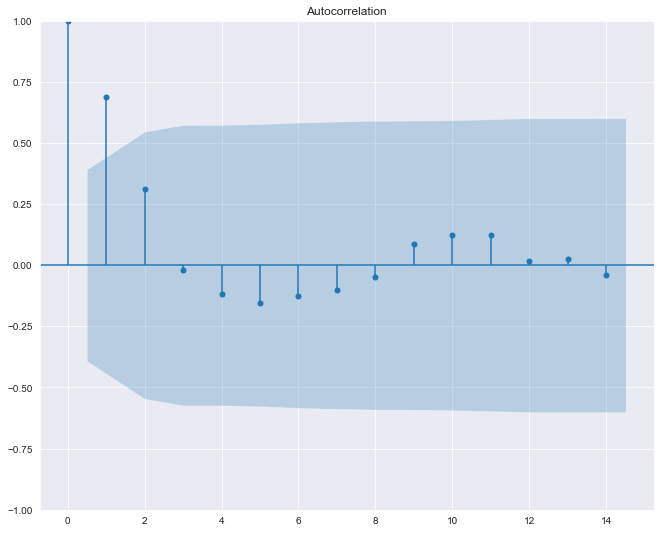

In [164]:
plot_acf(resampled['trip_distance'])
plt.show()

### 2.2.7 Выбор моделей машинного обучения

Так как в набре данных в основном используются числа, в качестве моделей машинного обучения будут использоваться регрессионные модели.

1. Линейная регрессия - Эта самый простой метод регрессии. Одним из его достоинств является лёгкость интерпретации результатов.


2. RandomForestRegressor - алгоритм машинного обучения, который сочетает в себе две основные идеи: метод бэггинга Бреймана и метод случайных подпространств, предложенный Тин Кам Хо. Алгоритм применяется для задач классификации, регрессии и кластеризации. Основная идея заключается в использовании большого ансамбля решающих деревьев, каждое из которых само по себе даёт очень невысокое качество классификации, но за счёт их большого количества результат получается хорошим.


3. KNeighborsRegressor - Цель прогнозируется путем локальной интерполяции целей, связанных с ближайшими соседями в обучающем наборе.

## 2.3 Отчет

### 2.3.1 Отчет о построении аналитической системы

1. Определение инструмента для построения аналитической системы

В качестве инструмента был выбран Orange — это инструмент для визуализации и анализа данных с открытым исходным кодом. Orange — это библиотека Python. Интеллектуальный анализ данных (Data mining) осуществляется с помощью визуального программирования или сценариев Python. Процесс построения workflow в Orange происходит путём манипуляций с иконками-виджетами.

2. Извлечение данных из внешней системы

С помощью виджета File можно извлечь данные. Для этого необходимо прописать путь к файлу, после загрузки файла появятся поля загружаемого набора, у которых можно изменить тип, а также присвоить ему target и features, если необходимо, некоторые поля можно убрать.

С помощью виджета SQL Table можно получить данные из базы данных заполнив все необходимые поля и выбрав таблицу.

Виджет Data Table позволяет отобразить загруженный набор данных.

3. Отслеживание тенденций

__Графики распределения. Виджет Distributions__

На графике количество записей по количеству пассажиров можно увидеть, что в основном люди в такси едут одни.

График количества записей по месяцам показал, что больше всего поездок было в декабре.

__Графики зависимости. Виджет Sccatter Plot__

График зависимости дистанции поездки и стоимости за проезд показывает, что чем больше стоимость поездки, тем больше пройденный путь.

График зависимости стоимости проезда и тарифа показывает, что чем больше тариф, тем дороже стоимость поездки.

4. Сортировка и фильтрация

С помощью виджета Group By можно отсортировать данные. Для начала необходимо выбрать по каким полям будут сортироваться данные, а потом выбрать условия сортировки, например по возрастанию или убыванию.

Виджет Filtre фильтрует клетки или гены по количеству положительных измерений. Можно выбрать гены в визуализации, чтобы удалить нечастые и слишком часто встречающиеся клетки/гены.

### 2.3.2 Отчет об анализе временных рядов

1. Импорт данных и работа в библиотеке Pandas

В качесте индекса берется дата и время начала поездки.

Изменение даты с объекта object на  datetime.

2. Изменение шага временного ряда, скользящее среднее

Изменение шага данных. Получение средних значений по каждому месяцу разных годов.

Удаление последней записи так как она относится к 2022 году.

График зависимости дистанции поездки от даты показал, что поездки с самыми большими дистанциями проходят летом в июне, июле и августе.

График зависимости стоимости проезда от даты показал, что стоимость проезда с 2020 сильно увеличилась и продолжает расти.

График зависимости суммы чаевых от даты показал, что сумма оставленных чаевых начала расти с 2021 года и продолжает расти.

3. Разложение временного ряда на компоненты

Вывод графиков сезонности, тренда и случайных колебаний.

Можно заметить, что временной ряд не стационарный, так как во всех случаях видно что тренд растет.

4. Проверка временного ряда на стационарность

Тест Дики-Фуллера показал, что временной ряд для стоимости поездки, суммы чаевых и дистанции поездки не стационарный, так как тест показал значение больше 0,5.

5. Автокорреляция

Берутся данные о стоимости поездки и подсчитывается корреляция для лага 1.

Вывод графика с автокорреляцией лага 1

6. Применение автокорреляционной функции к набору данных

Построены коррелограммы

7. Выбор моделей машинного обучения

Так как в набре данных в основном используются числа, в качестве моделей машинного обучения будут использоваться регрессионные модели. Линейная регрессия, RandomForestRegressor, KNeighborsRegressor.